<a href="https://colab.research.google.com/github/elyghthao/Machine-Learning-Databases-Project/blob/main/Machine_Learning_Database_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pylab
import numpy as np
import sklearn
from sklearn import linear_model
import sklearn.preprocessing as preprocessing
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.stats import proportion

# Load the Dataset

Data set can be found from this link: https://archive.ics.uci.edu/ml/datasets/student+performance.

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip

In [ ]:
!rm ./*.csv
!rm ./*.R
!rm student.txt
!unzip student.zip

In [ ]:
features = ["school", "sex", "age", "address", "famsize", "Pstatus",
        "Medu", "Fedu", "Mjob", "Fjob", "reason", "guardian",
        "traveltime", "studytime", "failures", "schoolsup", "famsup", "paid", 
        "activities", "nursery", "higher", "internet", "romantic", "famrel", 
        "freetime", "goout", "Dalc", "Walc", "health", "absences", "G1", "G2", "G3"] 

In [ ]:
df = pd.read_csv('student-por.csv', sep=';', skiprows=1, engine='python',names=features, na_values="?",error_bad_lines=False)

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [ ]:
print('Total number of participants')
print(len(df))
print( )

female = df[df['sex'] == "F"]
print('Number of female participants:')
print(len(female))
print( )

male = df[df['sex'] == "M"]
print('Number of male participants:')
print(len(male))
print( )

print('Percentage of female participants:')
print(len(female)/len(df))
print( )

print('Percentage of female participants:')
print(len(male)/len(df))
print( )

Total number of participants
649

Number of female participants:
383

Number of male participants:
266

Percentage of female participants:
0.5901386748844376

Percentage of female participants:
0.4098613251155624



In [ ]:
print('Total number of participants')
print(len(df))
print( )

urban = df[df['address'] == "U"]
print('Number of urban participants:')
print(len(urban))
print( )

rural = df[df['address'] == "R"]
print('Number of rural participants:')
print(len(rural))
print( )

print('Percentage of urban participants:')
print(len(urban)/len(df))
print( )

print('Percentage of rural participants:')
print(len(rural)/len(df))
print( )

urban_succeed = urban[urban['G3'] > 9]
urban_succeed

urban = df[df['address'] == "U"]
print('Number of urban students succeeding:')
print(len(urban_succeed))
print( )

print('Number of urban students failed:')
print(len(urban) - len(urban_succeed))
print( )

print('Percent of urban students succeeding:')
print(len(urban_succeed)/len(urban))
print( )

rural_succeed = rural[rural['G3'] > 9]
rural_succeed

rural = df[df['address'] == "R"]
print('Number of rural students succeeding:')
print(len(rural_succeed))
print( )

print('Number of rural students failed:')
print(len(rural) - len(rural_succeed))
print( )

print('Percent of rural students succeeding:')
print(len(rural_succeed)/len(rural))
print( )

Total number of participants
649

Number of urban participants:
452

Number of rural participants:
197

Percentage of urban participants:
0.6964560862865947

Percentage of rural participants:
0.3035439137134052

Number of urban students succeeding:
396

Number of urban students failed:
56

Percent of urban students succeeding:
0.8761061946902655

Number of rural students succeeding:
153

Number of rural students failed:
44

Percent of rural students succeeding:
0.7766497461928934



In [ ]:
female_succeed = female[female['G3'] > 9]
female_succeed

female = df[df['sex'] == "F"]
print('Number of female students succeeding:')
print(len(female_succeed))
print( )

print('Number of female students failed:')
print(len(female) - len(female_succeed))
print( )

print('Percent of female students succeeding:')
print(len(female_succeed)/len(female))
print( )

Number of female students succeeding:
333

Number of female students failed:
50

Percent of female students succeeding:
0.8694516971279374



In [ ]:
male_succeed = male[male['G3'] > 9]
male_succeed

male = df[df['sex'] == "M"]
print('Number of male students succeeding:')
print(len(male_succeed))
print( )

print('Number of male students failed:')
print(len(male) - len(male_succeed))
print( )

print('Percent of male students succeeding:')
print(len(male_succeed)/len(male))
print( )

Number of male students succeeding:
216

Number of male students failed:
50

Percent of male students succeeding:
0.8120300751879699



#Cleaning the Data

In [ ]:
df.head()
labels = df['G3']
labels = labels.replace(1, 0).replace(2, 0).replace(3, 0).replace(4, 0)
labels = labels.replace(5, 0).replace(6, 0).replace(7, 0).replace(8, 0)
labels = labels.replace(9, 0).replace(10, 1)
labels = labels.replace(11, 1).replace(12, 1).replace(13, 1).replace(14, 1)
labels = labels.replace(15, 1).replace(16, 1).replace(17, 1).replace(18, 1)
labels = labels.replace(19, 1).replace(20, 1)

print(labels)

0      1
1      1
2      1
3      1
4      1
      ..
644    1
645    1
646    0
647    1
648    1
Name: G3, Length: 649, dtype: int64


In [ ]:
data = df.drop(columns=["G3"])

#0 for Gabriel Pereira, 1 for Mousinho da Silveira
school = {'GP': 0, 'MS': 1}
data.school = [school[item] for item in data.school]

#0 for female, 1 for male
sex = {'F': 0, 'M': 1}
data.sex = [sex[item] for item in data.sex]

#0 for urban, 1 for rural
address = {'U': 0, 'R': 1}
data.address = [address[item] for item in data.address]

#0 for less than or equal to 3, 1 for greater than three
famsize = {'LE3': 0, 'GT3': 1}
data.famsize = [famsize[item] for item in data.famsize]

#0 for living together, 1 for living apart
Pstatus = {'T': 0, 'A': 1}
data.Pstatus = [Pstatus[item] for item in data.Pstatus]

#0 for teacher, 1 for health care, 2 for services, 3 for at home, 4 for other
Mjob = {'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}
data.Mjob = [Mjob[item] for item in data.Mjob]
data.Fjob = [Mjob[item] for item in data.Fjob]

#0 for close to home, 1 for school reputation, 2 for course preference, 3 for other
reason = {'home': 0, 'reputation': 1, 'course': 2, 'other': 3}
data.reason = [reason[item] for item in data.reason]

#0 for mother, 1 for father, 2 for other
guardian = {'mother': 0, 'father': 1, 'other': 2}
data.guardian = [guardian[item] for item in data.guardian]

#0 for yes, 1 for no
yesOrNo = {'yes': 0, 'no': 1}
data.schoolsup = [yesOrNo[item] for item in data.schoolsup]
data.famsup = [yesOrNo[item] for item in data.famsup]
data.paid = [yesOrNo[item] for item in data.paid]
data.activities = [yesOrNo[item] for item in data.activities]
data.nursery = [yesOrNo[item] for item in data.nursery]
data.higher = [yesOrNo[item] for item in data.higher]
data.internet = [yesOrNo[item] for item in data.internet]
data.romantic = [yesOrNo[item] for item in data.romantic]

train_proportion = 0.7
train_x, test_x, train_y, test_y = train_test_split(data, labels, 
                                                    train_size=train_proportion, 
                                                    test_size=1-train_proportion, 
                                                    random_state=419)

data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,0,1,1,4,4,3,0,2,0,2,2,0,0,1,1,1,0,0,1,1,4,3,4,1,1,3,4,0,11
1,0,0,17,0,1,0,1,1,3,4,2,1,1,2,0,1,0,1,1,1,0,0,1,5,3,3,1,1,3,2,9,11
2,0,0,15,0,0,0,1,1,3,4,3,0,1,2,0,0,1,1,1,0,0,0,1,4,3,2,2,3,3,6,12,13
3,0,0,15,0,1,0,4,2,1,2,0,0,1,3,0,1,0,1,0,0,0,0,0,3,2,2,1,1,5,0,14,14
4,0,0,16,0,1,0,3,3,4,4,0,1,1,2,0,1,0,1,1,0,0,1,1,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,1,0,2,3,2,4,2,0,1,3,1,1,1,1,0,1,0,0,1,5,4,2,1,2,5,4,10,11
645,1,0,18,0,0,0,3,1,0,2,2,0,1,2,0,1,0,1,1,0,0,0,1,4,3,4,1,1,1,4,15,15
646,1,0,18,0,1,0,1,1,4,4,2,0,2,2,0,1,1,1,0,0,0,1,1,1,1,1,1,1,5,6,11,12
647,1,1,17,0,0,0,3,1,2,2,2,0,2,1,0,1,1,1,1,1,0,0,1,2,4,5,3,4,2,6,10,10


# Data Exploration

Let's look at the data distribution between female and male students to better inform our analysis.

In [ ]:
all_female = data[(data['sex'] == 0)]
all_male = data[(data['sex'] == 1)]
print(len(all_female) / len(data))
print(len(all_male) / len(data))

0.5901386748844376
0.4098613251155624


So, there's about a 60/40 split with more female students than male students.

Let's look at the distribution between urban and rural students.

In [ ]:
all_urban = data[(data['address'] == 0)]
all_rural = data[(data['address'] == 1)]
print(len(all_urban) / len(data))
print(len(all_rural) / len(data))

0.6964560862865947
0.3035439137134052


We can see the majority of our original data favors urban students over rural students with about a 70/30 split.



Let's look at our train and test data sets as well

In [ ]:
test_female = test_x[(test_x['sex'] == 0)]
test_male = test_x[(test_x['sex'] == 1)]
test_urban = test_x[(test_x['address'] == 0)]
test_rural = test_x[(test_x['address'] == 1)]

print("Test data")
print("---------")
print("Female students:", len(test_female) / len(test_x))
print("Male students:  ", len(test_male) / len(test_x))
print()
print("Urban students:", len(test_urban) / len(test_x))
print("Rural students:", len(test_rural) / len(test_x))

Test data
---------
Female students: 0.5435897435897435
Male students:   0.4564102564102564

Urban students: 0.6461538461538462
Rural students: 0.35384615384615387


In [ ]:
train_female = train_x[(train_x['sex'] == 0)]
train_male = train_x[(train_x['sex'] == 1)]
train_urban = train_x[(train_x['address'] == 0)]
train_rural = train_x[(train_x['address'] == 1)]

print("Train data")
print("---------")
print("Female students:", len(train_female) / len(train_x))
print("Male students:  ", len(train_male) / len(train_x))
print()
print("Urban students:", len(train_urban) / len(train_x))
print("Rural students:", len(train_rural) / len(train_x))

Train data
---------
Female students: 0.6101321585903083
Male students:   0.3898678414096916

Urban students: 0.7180616740088106
Rural students: 0.28193832599118945


# Independence

In [ ]:
from sklearn import linear_model

num_train = len(train_x)
cls = linear_model.LogisticRegression(max_iter=100000)
cls.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = cls.predict(test_x)

overall_scores = cls.score(test_x, test_y)

overall_scores

0.9230769230769231

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions, test_y))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        25
           1       0.96      0.95      0.96       170

    accuracy                           0.92       195
   macro avg       0.82      0.85      0.84       195
weighted avg       0.93      0.92      0.92       195





### Demographic Parity

In [ ]:
scores = cls.predict_proba(test_x)[:, 1]
d = {'target' : test_y.values,
     'score' : scores,
     'prediction' : predictions,
     'address' : test_x['address'],
     'gender' : test_x['sex']}

marginals = pd.DataFrame(data=d, columns=['target', 'score', 'prediction', 'address', 'gender'])
marginals.head()

,target,score,prediction,address,gender
46,1,0.999177,1,0,0
197,1,0.999706,1,0,0
208,1,0.999889,1,0,1
326,1,0.999714,1,0,1
359,1,0.999999,1,1,0


#### For Female vs. Male

In [ ]:
postive_class = marginals[(marginals['prediction'] == 1) ]

positive_female = postive_class[(postive_class['gender'] == 0)]
positive_male = postive_class[(postive_class['gender'] == 1)]

print("# of positively classified males to females ->", len(positive_male)/len(positive_female))

female = marginals[marginals['gender'] == 0]
male = marginals[marginals['gender'] == 1]

print("% of positively classified males to females ->", (len(positive_male)/len(male))/(len(positive_female)/len(female)))

# of positively classified males to females -> 0.8085106382978723
% of positively classified males to females -> 0.9629452546019602


#### For Urban vs. Rural

In [ ]:
positive_urban = postive_class[(postive_class['address'] == 0)]
positive_rural = postive_class[(postive_class['address'] == 1)]

print("# of positively classified rural to urban students ->", len(positive_rural)/len(positive_urban))

urban = marginals[marginals['address'] == 0]
rural = marginals[marginals['address'] == 1]

print("% of positively classified rural to urban students ->", (len(positive_rural)/len(rural))/(len(positive_urban)/len(urban)))

# of positively classified rural to urban students -> 0.5315315315315315
% of positively classified rural to urban students -> 0.9706227967097533


We care more about the percentage comparison because 

# Seperation

In [ ]:
fpr_all, tpr_all, _ = metrics.roc_curve(marginals['target'], marginals['score']) 

No handles with labels found to put in legend.


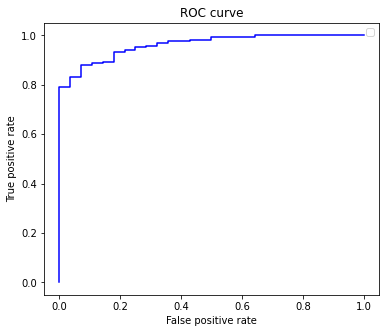

In [ ]:
plt.figure(1, figsize = (6,5))
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.plot(fpr_all, tpr_all, color='b')
plt.legend()
plt.show()

Please note that if a line does not show up on the ROC curve, it is most likely because none of the data points have a positive criteria or it overlaps with another ROC curve. This usually occurs with rural male because the red line takes precedence. Example Below:


---

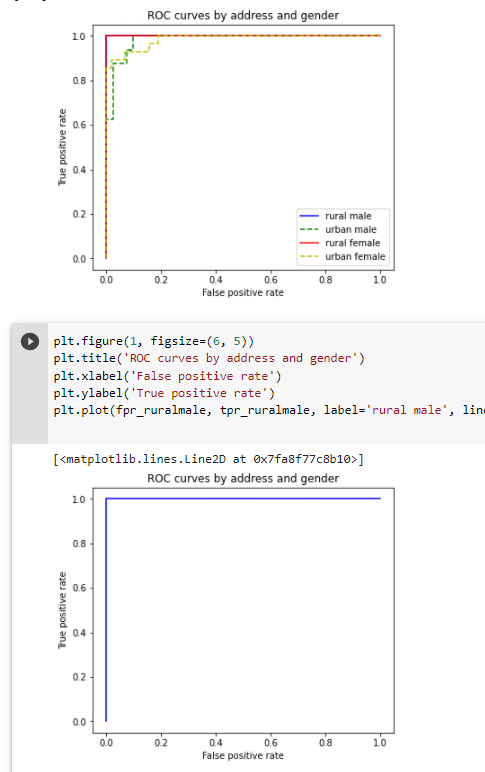


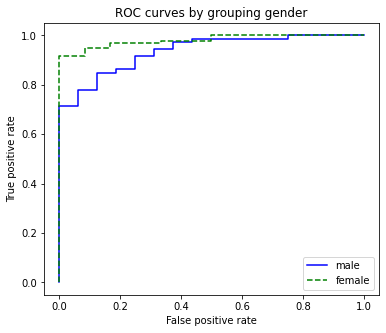

In [ ]:
male = marginals[marginals['gender'] == 1] 
fpr_male, tpr_male, _ = metrics.roc_curve(male['target'], male['score'])

female = marginals[marginals['gender'] == 0]
fpr_female, tpr_female, _ = metrics.roc_curve(female['target'], female['score'])

plt.figure(1, figsize=(6, 5))
plt.title('ROC curves by grouping gender')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.plot(fpr_male, tpr_male, label='male', linestyle='-', color='b')
plt.plot(fpr_female, tpr_female, label='female', linestyle='--', color='g')

plt.legend()
plt.show()

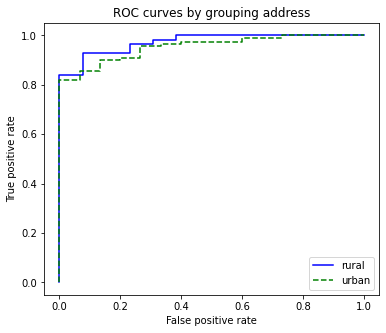

In [ ]:
rural = marginals[marginals['address'] == 1] 
fpr_rural, tpr_rural, _ = metrics.roc_curve(rural['target'], rural['score'])


urban = marginals[marginals['address'] == 0]
fpr_urban, tpr_urban, _ = metrics.roc_curve(urban['target'], urban['score'])


plt.figure(1, figsize=(6, 5))
plt.title('ROC curves by grouping address')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.plot(fpr_rural, tpr_rural, label='rural', linestyle='-', color='b')
plt.plot(fpr_urban, tpr_urban, label='urban', linestyle='--', color='g')

plt.legend()
plt.show()

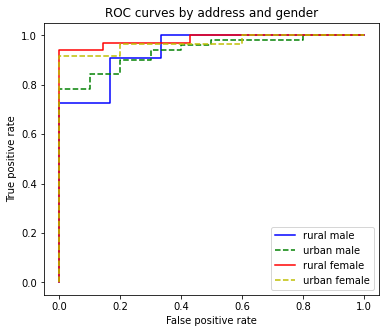

In [ ]:
rural = marginals[marginals['address'] == 1]
fpr_rural, tpr_rural, _ = metrics.roc_curve(rural['target'], rural['score'])

ruralmale = rural[rural['gender'] == 1]
fpr_ruralmale, tpr_ruralmale, _ = metrics.roc_curve(ruralmale['target'], ruralmale['score'])

ruralfemale = rural[rural['gender'] == 0]
fpr_ruralfemale, tpr_ruralfemale, _ = metrics.roc_curve(ruralfemale['target'], ruralfemale['score'])

urban = marginals[marginals['address'] == 0]
fpr_urban, tpr_urban, _ = metrics.roc_curve(urban['target'], urban['score'])

urbanmale = urban[urban['gender'] == 1]
fpr_urbanmale, tpr_urbanmale, _ = metrics.roc_curve(urbanmale['target'], urbanmale['score'])

urbanfemale = urban[urban['gender'] == 0]
fpr_urbanfemale, tpr_urbanfemale, _ = metrics.roc_curve(urbanfemale['target'], urbanfemale['score'])

plt.figure(1, figsize=(6, 5))
plt.title('ROC curves by address and gender')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.plot(fpr_ruralmale, tpr_ruralmale, label='rural male', linestyle='-', color='b')
plt.plot(fpr_urbanmale, tpr_urbanmale, label='urban male', linestyle='--', color='g')
plt.plot(fpr_ruralfemale, tpr_ruralfemale, label='rural female', linestyle='-', color='r')
plt.plot(fpr_urbanfemale, tpr_urbanfemale, label='urban female', linestyle='--', color='y')

plt.legend()
plt.show()